In [8]:
%matplotlib inline
import pydtmc
import numpy as np

NUMBER_OF_NODES = 512
R = 8

penMultiplierDisagreement = 1
nHoods = NUMBER_OF_NODES // R
#given equal stakes
#roundLength = ???
# 1/|neighbourhood| * 1/|n part of neighbourhood| 

expectedRewardPercentageHonest = (1/nHoods) * (1/R)

#one malicious user model

p_M = (1/nHoods) * (1/R)
p_H = (1/nHoods) * ((R-1)/R)
p_F = 1/nHoods

state = {
    0 : "unfrozen",
    1 : "mfrozen",
    2 : "hfrozen"
}
A = np.array([[0.0, 0.75, 0.25], [0.25, 0.75, 0.0], [0.25, 0.0, 0.75]])
A = np.array([[1-(p_M+p_H), p_H, p_M], [p_F,1-p_F, 0.0], [p_F, 0.0, 1-p_F]])



In [9]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)



left eigen vectors = 
 [[ 0.74926865  0.74926865  0.        ]
 [ 0.65561007 -0.65561007 -0.70710678]
 [ 0.09365858 -0.09365858  0.70710678]] 

eigen values = 
 [1.      +0.j 0.96875 +0.j 0.984375+0.j]


In [10]:
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized

[0.5000000000000054, 0.4374999999999996, 0.06249999999999491]


DISCRETE-TIME MARKOV CHAIN
 SIZE:           3
 RANK:           3
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        YES
 REVERSIBLE:     YES
 SYMMETRIC:      NO

[3996.85086614 4877.68268048 3842.68161406]
[0.33333333333333975, 0.3333333333333414, 0.3333333333333189]
[ 2.   2.5 10. ]


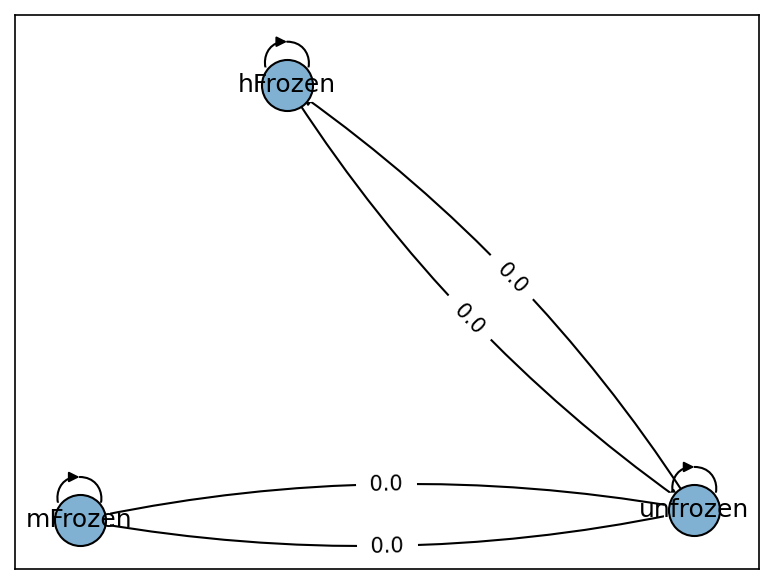

In [25]:
#adjacency matrix 3x3
naiveP = [[1-(p_M+p_H), p_M, p_H], 
     [1/R,((R-1)/R), 0.0], 
     [1/R, 0.0, ((R-1)/R)]]

mc = pydtmc.MarkovChain(A, ['unfrozen', 'mFrozen', 'hFrozen'])
print(mc)



print(mc.expected_rewards(10000,[0,1,1/3]))

unnormalised_rewards = mc.expected_rewards(10000,[1,1,1])
normalised_rewards = []
for k in unnormalised_rewards:
    high = sum(unnormalised_rewards)
    normalised_rewards.append(k/high)
print(normalised_rewards)

print(mc.mean_recurrence_times())
res =  mc.simulate(10000,initial_state="unfrozen", seed=32)

pydtmc.plot_graph(mc, dpi=150,force_standard=True)

In [31]:
mc.states

['unfrozen', 'mFrozen', 'hFrozen']

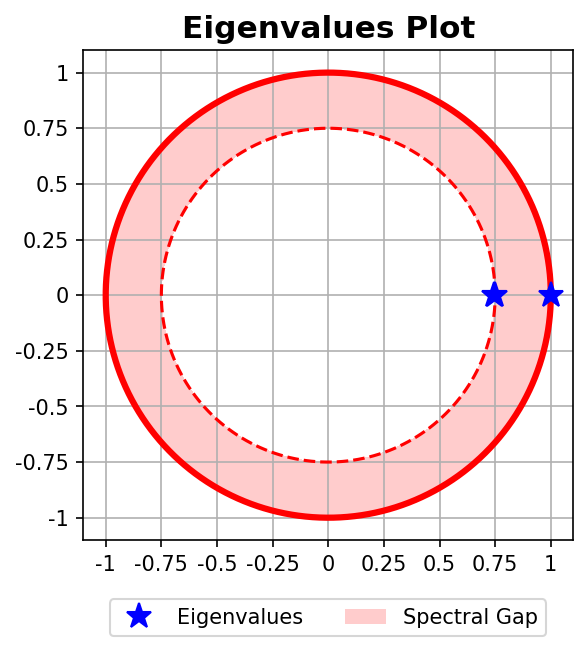

In [29]:
pydtmc.plot_eigenvalues(mc, dpi=150)